# Viral Pneumonia and Lung Opacity

## Viral Pneumonia

Viral pneumonia is a lung infection caused by various viruses, such as influenza, respiratory syncytial virus (RSV), or coronaviruses. It can result in inflammation of the air sacs in the lungs, leading to symptoms such as:

- Cough
- Fever
- Shortness of breath
- Fatigue

Unlike bacterial pneumonia, viral pneumonia typically does not respond to antibiotics. Treatment often includes rest, hydration, and medications to alleviate symptoms. Severe cases may require hospitalization and supportive care.

## Lung Opacity

Lung opacity refers to areas on a chest X-ray or CT scan where the normal appearance of the lung is obscured. It is not a disease itself but rather a radiologic finding that can indicate various underlying conditions, including:

- Pneumonia
- Pulmonary edema
- Fibrosis
- Tumors

Lung opacity can appear as a result of infection, inflammation, or other lung abnormalities. Further medical evaluation, such as imaging studies and lab tests, is often required to determine the cause and guide treatment.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/623.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/764.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/1075.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/771.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/208.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/820.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/473.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/1031.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/333.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/1024.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/537.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/45.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/369.jpg
/kaggle/in

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator # I didn't use it in this example, but it's useful for data augmentation and loading data

In [2]:
path_images = "/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/"

In [4]:
images = []
labels = []

In [ ]:
def load_images_from_folder(base_folder, target_size=(224, 224)):
    class_names = ['Lung_Opacity', 'Normal', 'Viral Pneumonia']
    for class_name in class_names:
        folder_path = os.path.join(base_folder, class_name)
        for filename in os.listdir(folder_path):
            if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
                image_path = os.path.join(folder_path, filename)
                image = cv2.imread(image_path)
                image = cv2.resize(image, target_size)
                image = image / 255.0
                image = cv2.GaussianBlur(image, (5,5), 0)
                images.append(image)
                labels.append(class_names.index(class_name))
    return images, labels

## Python Code: Loading Images from Folder

The following Python function is used to load images from a folder, preprocess them, and prepare labels for classification:

```python
import os
import cv2

def load_images_from_folder(base_folder, target_size=(224, 224)):
    class_names = ['Lung_Opacity', 'Normal', 'Viral Pneumonia']
    images, labels = [], []
    for class_name in class_names:
        folder_path = os.path.join(base_folder, class_name)
        for filename in os.listdir(folder_path):
            if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
                image_path = os.path.join(folder_path, filename)
                image = cv2.imread(image_path)
                image = cv2.resize(image, target_size)
                image = image / 255.0
                image = cv2.GaussianBlur(image, (5,5), 0)
                images.append(image)
                labels.append(class_names.index(class_name))
    return images, labels
```

### Explanation of the Code

1. **Base Folder and Class Names:**
   - The function assumes a base folder containing subfolders named after the class labels (e.g., 'Lung_Opacity', 'Normal', 'Viral Pneumonia').

2. **File Iteration:**
   - It iterates over each subfolder and processes images with `.jpg`, `.png`, or `.jpeg` extensions.

3. **Image Preprocessing:**
   - Images are resized to the target size (default: 224x224 pixels).
   - The pixel values are normalized to the range [0, 1].
   - Gaussian blur is applied to reduce noise.

4. **Labels:**
   - Labels are generated based on the index of the class name in the `class_names` list.

5. **Return:**
   - Returns two lists: `images` (preprocessed image data) and `labels` (corresponding class indices).

This function is particularly useful for preparing datasets for deep learning models.

In [8]:
images, labels = load_images_from_folder(path_images)

In [9]:
images = np.array(images)
labels = np.array(labels)

In [10]:
print(f"Total images: {len(images)}")
print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")

Total images: 3475
Images shape: (3475, 224, 224, 3)
Labels shape: (3475,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Training data: {X_train.shape}")
print(f"Test data: {X_test.shape}")

Training data: (2780, 224, 224, 3)
Test data: (695, 224, 224, 3)


In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f"Training data: {X_train.shape}")
print(f"Validation data: {X_val.shape}")
print(f"Test data: {X_test.shape}")

Training data: (2224, 224, 224, 3)
Validation data: (556, 224, 224, 3)
Test data: (695, 224, 224, 3)


# Create a CNN model

In [13]:
def create_cnn_model(input_shape=(224, 224, 3), num_classes=3):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

## Python Code: Creating a CNN Model

The following Python function defines a Convolutional Neural Network (CNN) model for image classification:

```python
from tensorflow.keras import models, layers

def create_cnn_model(input_shape=(224, 224, 3), num_classes=3):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model
```

### Explanation of the Code

1. **Input Shape:**
   - The input shape is defined as `(224, 224, 3)`, representing an RGB image of size 224x224 pixels.

2. **Convolutional Layers:**
   - Three convolutional layers are added, each followed by a MaxPooling layer to reduce spatial dimensions and capture essential features.
   - The number of filters increases from 32 to 128 across the layers.

3. **Flattening:**
   - The feature maps are flattened into a 1D vector for use in the fully connected layers.

4. **Dense Layers:**
   - A Dense layer with 128 units and ReLU activation is used to learn complex patterns.
   - A Dropout layer with a rate of 0.5 is added to prevent overfitting.
   - The output layer uses the `softmax` activation function to output probabilities for each class.

5. **Output:**
   - The function returns the compiled CNN model ready for training on a dataset.

This model is well-suited for image classification tasks involving multiple categories, such as differentiating between `Lung_Opacity`, `Normal`, and `Viral Pneumonia` images.


In [14]:
model = create_cnn_model(input_shape=(224, 224, 3), num_classes=3)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Python Code: Compiling and Optimizing the Model

The following Python code snippet compiles the CNN model for training:

```python
model = create_cnn_model(input_shape=(224, 224, 3), num_classes=3)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
```

### Explanation of the Code

1. **Model Creation:**
   - The `create_cnn_model` function is called to initialize the CNN model with the specified input shape and number of classes.

2. **Compilation:**
   - The model is compiled with the following parameters:
     - **Optimizer:** `adam` is used for efficient and adaptive gradient-based optimization.
     - **Loss Function:** `sparse_categorical_crossentropy` is used because the labels are integer-encoded.
     - **Metrics:** `accuracy` is specified to monitor the performance during training and evaluation.

3. **Output:**
   - The compiled model is ready for training on the dataset using methods like `fit` or `fit_generator`.

This step ensures that the model is optimized for multi-class classification tasks and can efficiently learn from the training data.


In [15]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.6446 - loss: 0.8561 - val_accuracy: 0.8273 - val_loss: 0.4275
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.8011 - loss: 0.4649 - val_accuracy: 0.8147 - val_loss: 0.4119
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.8238 - loss: 0.4112 - val_accuracy: 0.8579 - val_loss: 0.3721
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.8480 - loss: 0.3664 - val_accuracy: 0.8615 - val_loss: 0.3564
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.8552 - loss: 0.3547 - val_accuracy: 0.8741 - val_loss: 0.3322
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.8786 - loss: 0.3093 - val_accuracy: 0.8687 - val_loss: 0.3271
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.8975 - loss: 0.2774 - val_accuracy: 0.8489 - val_loss: 0.3609
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.9041 - loss: 0.2282 - val_accuracy: 0.8885 - v

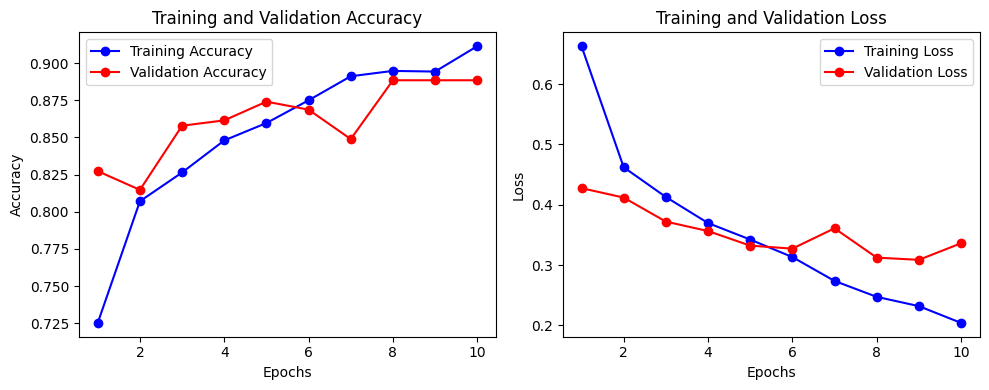

In [ ]:
acc = history.history['accuracy']           
val_acc = history.history['val_accuracy']   
loss = history.history['loss']            
val_loss = history.history['val_loss']       

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()